# **E-Commerce Customer Churn**
### by Yuni Sartika

## **Business Problem Understanding**

**Context** 

*Customer* atau pelanggan merupakan hal yang sangat penting bagi kelangsungan hidup suatu perusahaan baik perusahaan barang maupun jasa. Dengan ditinggalkan pelanggan sebuah perusahaan akan mengalami kerugian yang sangat besar.

Kehilangan pelanggan (*Customer Churn*) juga menjadi salah satu tantangan yang harus dihadapi oleh perusahaan *e-commerce*, dimana konsumen pada *e-commerce* dengan mudah membandingkan produk dan jasa yang mereka peroleh dan dengan mudah berpindah ke komptitor lain (Pondel dkk, 2021).

Menurut Hong dalam Yulianti (2016), *churn* pelanggan adalah kecenderungan pelanggan untuk meninggalkan penyedia layanan, atau beralihnya pelanggan dari satu penyedia layanan ke yang lainnya. Sementara itu, menurut Lazarov et al dalam Suryana (2014) *churn* berasal dari kata *“change”* dan *“turn”* yang berarti tidak berlanjutnya kontrak. Hal ini telah menjadi isu penting yang merupakan salah satu tantangan utama oleh banyak perusahaan di era global ini dan harus dihadapinya. Disamping itu menurut Mathai (2020) Biaya untuk mendapatkan pelanggan baru biasanya lima sampai enam kali lebih tinggi dari pada biaya mempertahankan pelanggan yang sudah ada. Melihat begitu mahalnya untuk memperoleh pelanggan baru tentunya perusahaan akan lebih memilih mempertahankan pelanggan dibanding dengan mendapatkan pelanggan baru. Melihat hasil fakta tersebut maka banyak perusahaan sekarang lebih beralih untuk mempertahankan pelanggan yang ada dan menghindari churn pelanggan.



**Problem Statement**

Pada e-commerce, konsumen dengan mudah membandingkan produk dan jasa yang mereka peroleh dan dengan mudah berpindah ke komptitor. Hal ini akan merugikan perusahaan karena akan mengurangi jumlah pelanggan dan akan berdampak pada berkuranganya pendapatan perusahaan. sehingga perusahaan harus mencari cara untuk mempertahannkan customer tersebut agar tidak churn dan berpindah ke kompetitor.

**Goals**

Berdasarkan permasalahan yang dihadapi, perusahaan harus bisa memprediksi customer yang berpotensi melakukan churn dengan tepat, lalu memberikan treatment yang tepat untuk customer tersebut agar tidak churn. Sehingga perusahaan bisa mempertahankan keuntungan yang telah didapatkan. 

**Analytic Approach**

Pendekatan awal yang akan dilakukan adalah dengan menganalisa data untuk menemukan pola yang membedakan customer yang akan churn atau tidak. 

Kemudian kita akan melakukan prediksi menggunakan machine learning dengan metode *Supervised Learning* (*Binary Classification*). kita akan mengevaluasi beberapa model klasifikasi yang memberikan prediksi paling akurat pada seorang pelanggan yang akan/ingin berhenti menggunakan produk/layanan.

**Metric Evaluation**

Target:

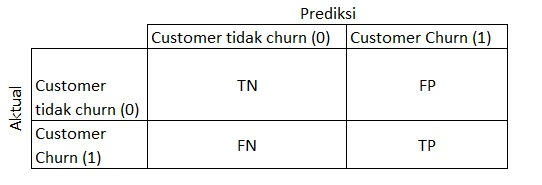

0: customer tidak churn

1: customer churn

Confusion Metrix Term:

*   TP: customernya aktualnya churn dan diprediksi churn
*   TN: customernya aktualnya tidak churn dan diprediksi tidak churn
*   FN: customernya aktualnya churn dan diprediksi tidak churn
*   FP: customernya aktualnya tidak churn dan diprediksi churn

FN (False Negative):

Kekurangan
*   Kehilangan customer (alias churn)
*   Adanya cost customer acquistion untuk menggantikan customer yang telah churn


FP (False Positive):

Kekurangan
*   Salah target treatment untuk customer yang tidak churn (tapi diprediksi churn)
*   Sia-sianya biaya customer retention, waktu dan sumber daya

Jadi, model yang kita cari adalah model yang mengurangi hilangnya pelanggan loyal, tetapi tetap memperhatikan pengeluaran biaya pemasaran untuk pelanggan yang kurang tepat. Recall dan precision yang diseimbangkan akan dari kelas positif (Pelanggan churn). Metrik yang akan digunakan adalah ROC-AUC.

## **Data Understanding**

Kumpulan data ini milik perusahaan ECommerce online terkemuka. Perusahaan tersebut ingin mengetahui pelanggan mana yang akan churn, sehingga mereka dapat mengambil tindakan yang tepat kepada pelanggan yang diprediksi churn dengan menawarkan berbagai macam promo.

**Attributes Information**


*   Tenure : Masa pengguna berlangganan di perusahaan
*   WarehouseToHome : Jarak antara gudang dan rumah pengguna
*   NumberOfDeviceRegistered : Jumlah perangkat yang diregistrasikan terhadap satu pengguna/akun
*   PreferredOrderCat : Kategori yang sering dipesan dalam satu bulan terakhir
*   SatisfactionScore : Nilai kepuasan pelanggan terhadap pelayanan
*  MaritalStatus : Status pernikahan pelanggan 
*   NumberOfAddress : Jumlah alamat yang terdaftar dalam satu pengguna
*   Complain : Keluhan yang diajukan dalam satu bulan terakhir
*   DaySinceLastOrder : Hari terakhir pemesanan yang dilakukan oleh pelanggan
*   CashbackAmount : Rata-rata cashback dalam satu bulan terakhir
*   Churn : Identifikasi pengguna churn atau tidak. Jika bernilai 1 maka pengguna churn, Jika bernilai 0 maka pengguna tidak churn

**Import Libraries**

In [53]:
# Library
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Saving Model
import pickle
import joblib


**Load Dataset**

In [2]:
df = pd.read_csv('drive/MyDrive/Capstone Project Modul 3/data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## **Exploratory Data Analysis**

####**Dataset Information**

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
# Menampilkan statistik deskriptif dari numerical variable
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [5]:
# Menampilkan statistik deskriptif dari categorical variable
df.describe(include='O')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


#### **Data Distribution**

In [6]:
# cek distribusi data

from scipy.stats import normaltest

kolom=['Churn','Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Churn,tidak normal
Tenure,tidak normal
WarehouseToHome,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
DaySinceLastOrder,tidak normal
CashbackAmount,tidak normal


'Data kuantitatif memiliki distribusi data tidak normal, \nsehingga kita akan menggunakan ukuran data median sebelum melakukan EDA.'

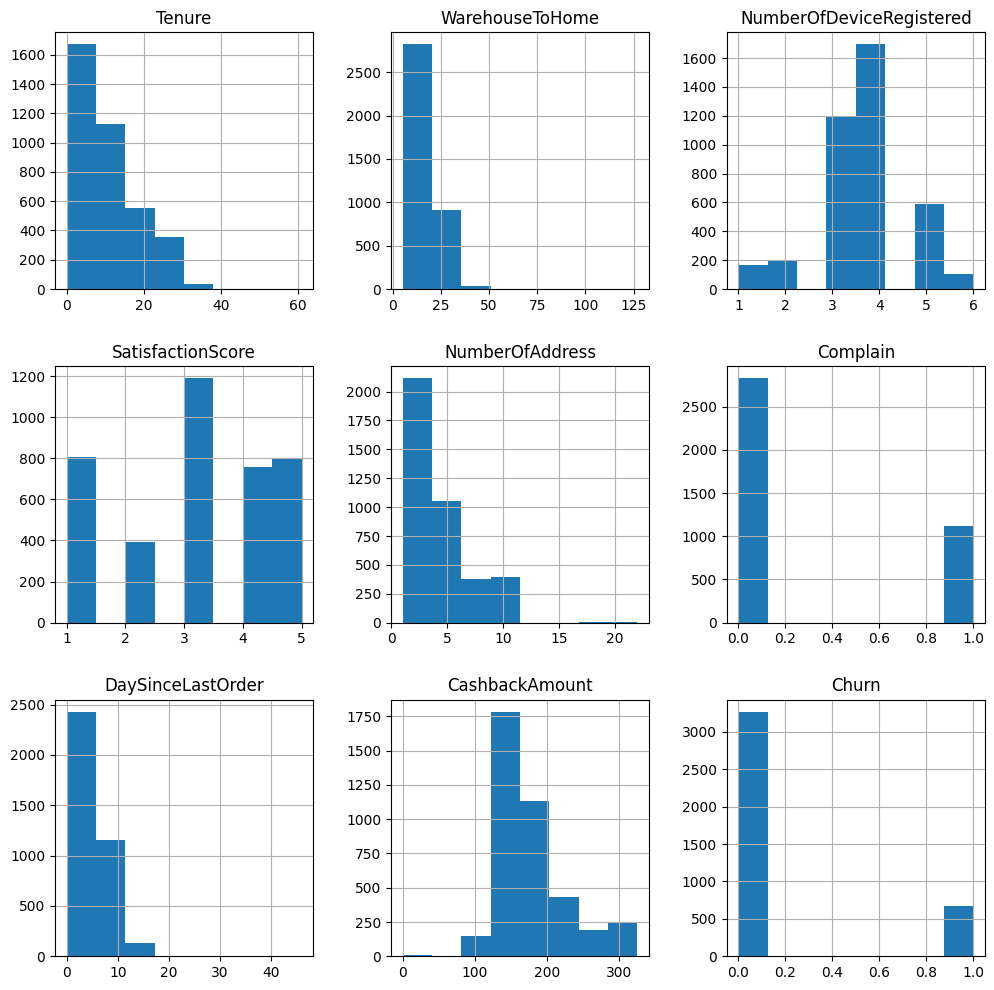

In [7]:
df.hist(bins=8,figsize=(12,12));

'''Data kuantitatif memiliki distribusi data tidak normal, 
sehingga kita akan menggunakan ukuran data median sebelum melakukan EDA.'''

### **Data Correlation**

**Numerical Feature vs Target**

Untuk dapat memahami korelasi antara feature numerical dengan target, maka dilakukanlah uji korelasi antar feature. Karena semua feature numerical tidak terdistribusi normal, maka uji korelasi akan menggunakan uji korelasi 'spearman'. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Kekuatan korelasi:
*   0 - 0.2: sangat lemah
*   0.2 - 0.4: lemah
*   0.4 - 0.6: moderate
*   0.6 - 0.8: kuat
*   0.8 - 1.0: sangat kuat

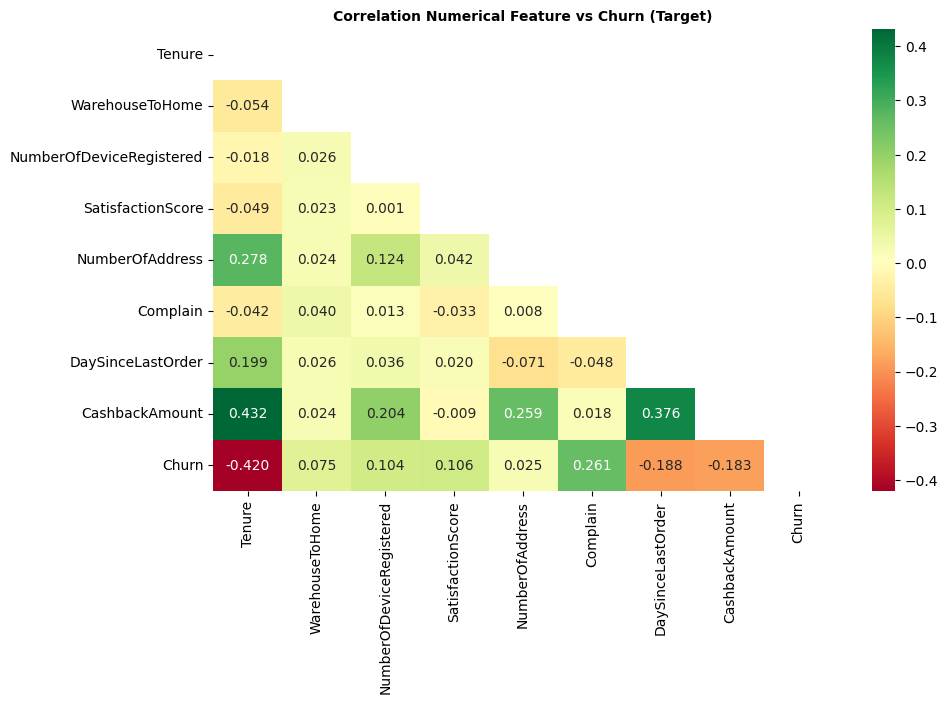

In [8]:
corr = df.corr('spearman')
plt.figure(figsize=(10,6))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=10, weight='bold');

Berdasarkan heatmap correlation diatas, didapatkan bahwa korelasi Churn dengan numerical feature adalah sebagai berikut:

*   Feature Tenure memiliki hubungan korelasi negatif terkuat dengan score -0.420 dan kekuatan hubungannya moderate. Artinya diasumsikan semakin rendah tenure dari customer, maka semakin tinggi angka customer yang churn.
*   Sedangkan feature Complain memiliki hubungan korelasi positif terkuat dengan score 0.250 dan kekuatan hubungannya lemah.
*   Sedangkan feature-feature lainnya memiliki hubungan korelasi yang sangat lemah dengan score dibawah 0.2.

**Categorical Feature vs Target**

Untuk melihat menguji keterkaitan antara feature categorical dengan target, disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:

Ho: feature categorical dan target Churn tidak saling terkait (independent)

Ha: feature categorical dan target Churn saling terkait (dependent)

In [9]:
cat_cols = list(df.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


Berdasarkan hasil uji chi-square diatas, diketahui bahwa semua feature categorical memiliki chi-square score < 0.05 (berhasil menolak Ho). Artinya masing-masing feature categorical saling terkait dengan target Churn (proporsinya berbeda signifikan).

### **Inconsistent Data**

Terdapat fitur dengan kategori yang bermakna sama dengan kategori lain, contohnya: Mobile dan Mobile Phone pada kolom PreferedOrderCat . Oleh karena itu, kita melakukan perubahan pada masalah yang tersebut.

In [10]:
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 Tenure [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]
 WarehouseToHome [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]
 NumberOfDeviceRegistered [4 3 6 2 5 1]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
 SatisfactionScore [3 1 4 2 5]
 MaritalStatus ['Single' 'Married' 'Divorced']
 NumberOfAddress [ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]
 Complain [0 1]
 DaySinceLastOrder [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]
 CashbackAmount [143.32 129.29 168.54 ... 147.66 231.86 153.73]
 Churn [0 1]


In [11]:
#Mengubah PreferedOrderCat Device dari Mobile jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [12]:
 # printing unique values of each columns
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Tenure: 
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

WarehouseToHome: 
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

NumberOfDeviceRegistered: 
[4 3 6 2 5 1]

PreferedOrderCat: 
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']

SatisfactionScore: 
[3 1 4 2 5]

MaritalStatus: 
['Single' 'Married' 'Divorced']

NumberOfAddress: 
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Complain: 
[0 1]

DaySinceLastOrder: 
[ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

CashbackAmount: 
[143.32 129.29 168.54 ... 147.66 231.86 153.73]

Churn: 
[0 1]



### **Missing Value**

In [13]:
# Memeriksa missing value dan unique value pada dataset
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(3).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,Tenure,194,4.92,36,"[1.0, 17.0, 1.0]"
1,WarehouseToHome,169,4.29,33,"[nan, 31.0, 20.0]"
2,NumberOfDeviceRegistered,0,0.00,6,"[4, 4, 4]"
3,PreferedOrderCat,0,0.00,5,"[Fashion, Laptop & Accessory, Mobile Phone]"
4,SatisfactionScore,0,0.00,5,"[3, 3, 2]"
5,MaritalStatus,0,0.00,3,"[Divorced, Married, Married]"
6,NumberOfAddress,0,0.00,14,"[3, 8, 4]"
7,Complain,0,0.00,2,"[0, 1, 1]"
8,DaySinceLastOrder,213,5.40,22,"[0.0, 3.0, 0.0]"
9,CashbackAmount,0,0.00,2335,"[149.51, 112.81, 261.95]"


Pada dataset ini, terdapat beberapa variabel yang memiliki missing value. Untuk lebih mengetahui mengenai distribusi data yang memiliki missing value, maka kami menggunakan library missingno untuk memvisualisasikannya.

**Bar Plot**

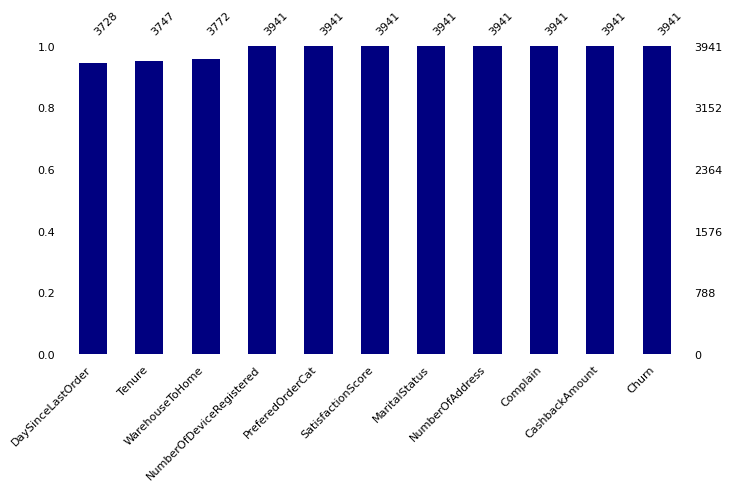

In [14]:
msno.bar(df, sort="ascending", figsize=(8,4), fontsize=8, color='navy');

Pada bar plot diatas menunjukkan bahwa variabel DaySinceLastOrder, Tenure, dan WarehouseToHome adalah variabel-variabel yang memiliki missing values. Dari bar plot pun kita dapat mengetahui bahwa jumlah data yang hilang tidak begitu banyak.

**Matrix Plot**

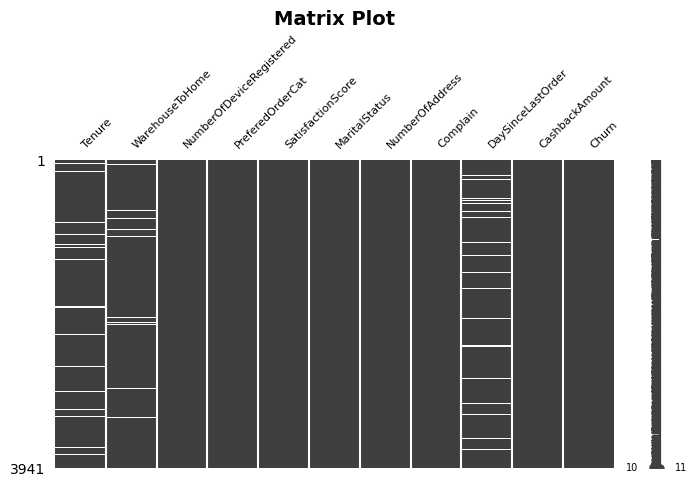

In [15]:
# Sebaran missing value di dalam data
msno.matrix(df, figsize=(8,4), fontsize=8).set_title('Matrix Plot', size=14, weight='bold');

Jika dilihat pada matrix plot diatas, terlihat bahwa pada variabel dengan missing values memiliki pola yang acak (tidak menunjukkan pola yang sama antar variabel).

**Heatmap**

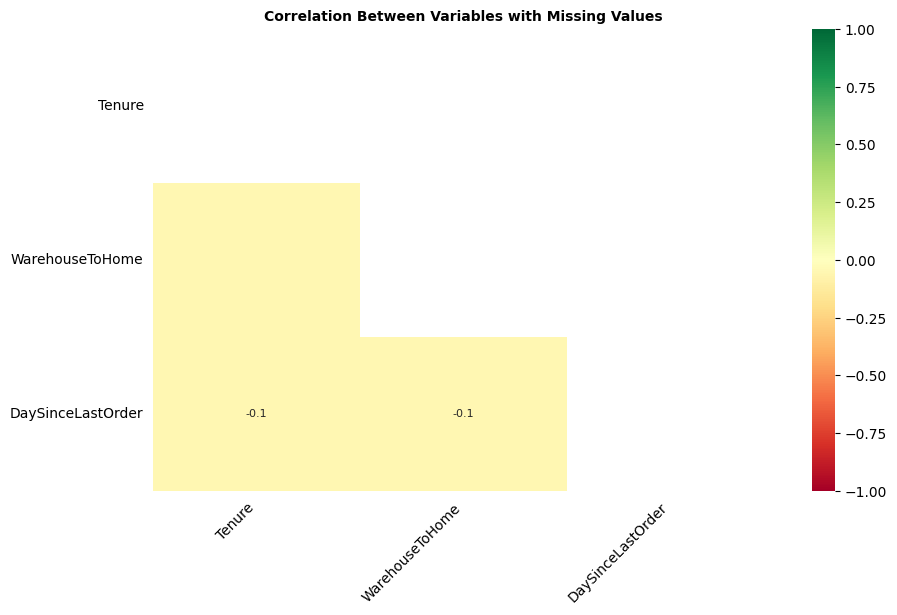

In [16]:
msno.heatmap(df, cmap="RdYlGn", figsize=(10,6), fontsize=10).set_title('Correlation Between Variables with Missing Values', size=10, weight='bold');

Heatmap yang menunjukkan korelasi nulitas antara berbagai variabel yang memiliki data yang hilang pada dataset.

Korelasi nulitas berkisar dari -1 hingga 1.

(-1) - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.

( 0) - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.

( 1) - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada


---

Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

### **Data Analysis**

Sebelum dilakukan analisis, kami memiliki asumsi-asumsi terkait analisis customer churn ini. Adapun asumsi kami akan dituangkan dalam beberapa pertanyaan sebagai berikut:
*   Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan?
*   Apakah semakin jauh jarak lokasi customer dengan lokasi gudang pengiriman akan menunjukkan tingkat churn yang tinggi?
*   Apakah semakin banyak device yang didaftarkan oleh masing-masing pelanggan  menyebabkan semakin banyak pula pelanggan berhenti dari layanan ecommerce?
*   Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi?
*   Apakah customer yang sudah menikah yang lebih banyak berhenti dari layanan ecommerce?
*   Apakah semakin banyak alamat yang didaftarkan oleh masing-masing pelanggan  menyebabkan semakin banyak pula pelanggan berhenti dari layanan ecommerce?
*   Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce?
*   Apakah customer yang keluar dari layanan ecommerce tidak lagi melakukan order pembelanjaan seminggu terakhir?
*   Apakah semakin kecil rata-rata cashback yang diperoleh akan menyebabkan customer churn?



**Proporsi Customer Churn (Target)**

,class,n_churned
0,0,3267
1,1,674


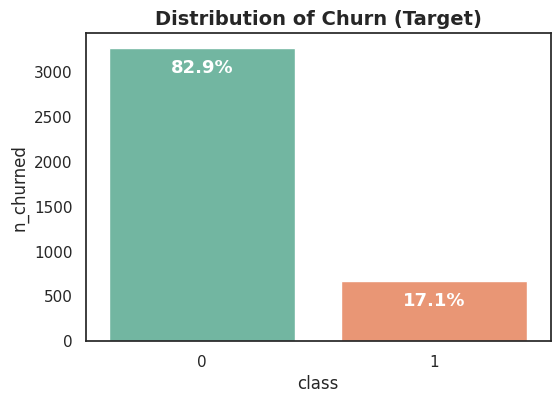

In [17]:
sns.set_theme(style='white', palette='Set2')

plt.figure(figsize=(6,4))
total = len(df)
ax = sns.countplot(data=df, x='Churn')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.4, p.get_height()-125), ha='center', va='top', color='white', size=13, weight='bold')
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
ax.set_xlabel('class')
ax.set_ylabel('n_churned')

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

Dalam gambar diatas, kita dapat mengetahui bahwa terdapat 17.1% customer yang meninggalkan layanan ecommerce ini. Angka tersebut juga menunjukkan bahwa variable Churn yang sebagai target dalam modeling memiliki data yang moderate imbalance. Data yang imbalance ini perlu ditreatment agar saat dilakukan modeling, algoritmanya tidak belajar lebih banyak hanya pada data kelas negatif saja (class 0).

**Fitur 'Tenure'**

Fitur 'Tenure' menandakan informasi tentang sudah berapa lama para customer tersebut bergabung dalam layanan e-commerce ini. Berdasarkan analisis data visualisasi dibawah, para customer memiliki periode waktu bergabung yang kurang dari 2 bulan cenderung melakukan churn atau berhenti melakukan transaksi di e-commerce ini (persentase yang churn pada tenure kurang dari 2 bulan lebih dari 50%). Hal ini bisa diakibatkan oleh beberapa kemungkinan antara lain:

*   Pelanggan baru tersebut hanya mencoba fitur-fitur yang ada pada pelayanan 
e-commerce tsb
*   Pelanggan tersebut churn setelah mencoba fitur di e-commerce lain yang dirasa lebih menguntungkan.
*   Support customer yang tidak memuaskan
*   Ketersediaan produk dalam ecommerce
*   Kualitas layanan ecommerce (misal proses pembayaran, proses pengiriman, dll)

Untuk meningkatkan Tenure customer perusahaan dapat mempertimbangkan implementasi gamefication dalam ecommerce (misal. sistem poin, sistem leveling, etc.)

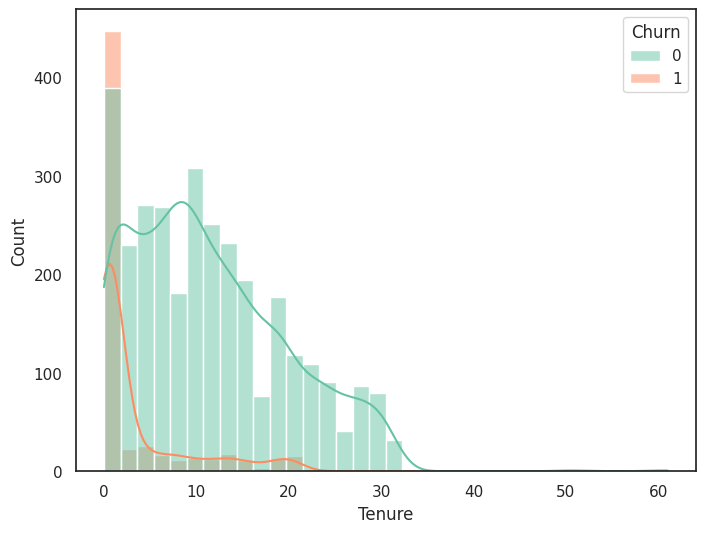

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,152.0,195.0,347.0,56.2
1.0,237.0,252.0,489.0,51.5
2.0,107.0,10.0,117.0,8.5
3.0,123.0,13.0,136.0,9.6
4.0,138.0,13.0,151.0,8.6


In [18]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Tenure',hue='Churn',kde=True)
plt.show()

crosstab_viz('Churn', 'Tenure').T.head(5)

**Fitur 'WarehouseToHome'**

Fitur 'WarehouseToHome' merupakan fitur yang berisi informasi jarak lokasi customer terhadap lokasi gudang pengiriman. Berdasarkan analisis data visualisasi dibawah, para customer yang berlokasi semakin jauh dari lokasi pengiriman barang cenderung memiliki tingkat churn yang lebih tinggi. Hal ini dapat disebabkan karena biaya pengiriman barang yang semakin lebih tinggi jika lokasi customer lebih jauh.

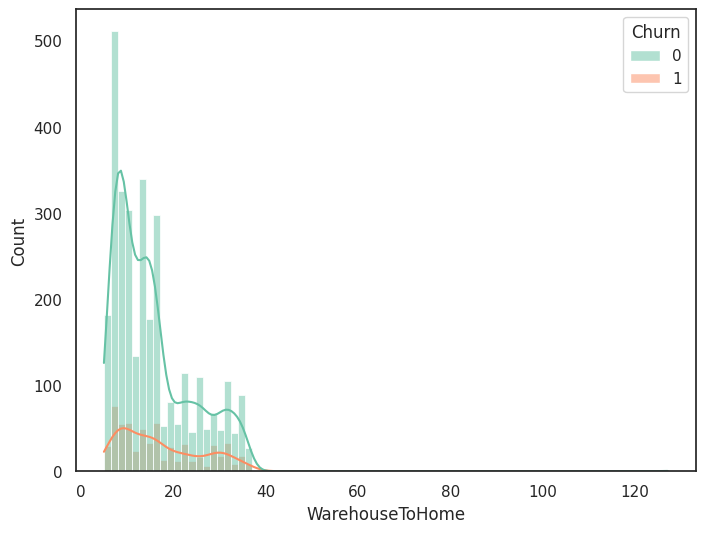

Churn,0,1,Total,Churn %
WarehouseToHome,,,,
32.0,53.0,8.0,61.0,13.1
33.0,44.0,8.0,52.0,15.4
34.0,37.0,6.0,43.0,14.0
35.0,52.0,12.0,64.0,18.8
36.0,27.0,9.0,36.0,25.0
127.0,1.0,0.0,1.0,0.0


In [19]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='WarehouseToHome',hue='Churn',kde=True)
plt.show()

crosstab_viz('Churn', 'WarehouseToHome').T.tail(6)

**Fitur 'NumberOfDeviceRegistered'**

Fitur 'NumberOfDeviceRegistered' berisikan informasi tentang jumlah device yang didaftarkan oleh pelanggan ke aplikasi e-commerce. Dari hasil analisis data dibawah, semakin banyak device yang didaftarkan oleh masing-masing pelanggan maka kecenderungan pelanggan tersebut untuk churn dari e-commerce ini akan semakin tinggi. Hal ini dapat diakibatkan karena para pelanggan tersebut hanya ingin menikmati promo awal yang biasanya disediakan oleh e-commerce kepada para pelanggan baru.

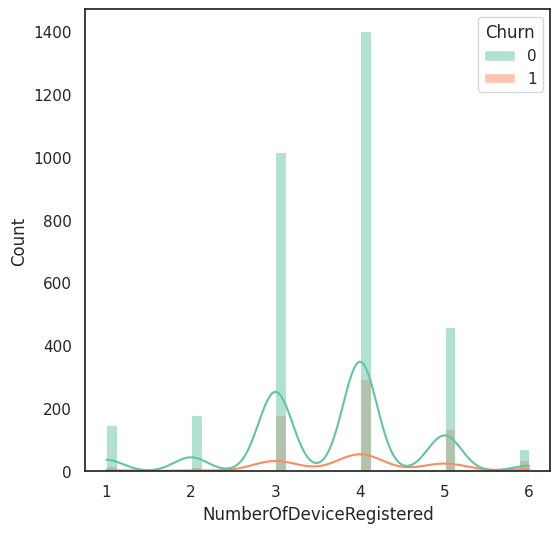

Churn,0,1,Total,Churn %
NumberOfDeviceRegistered,,,,
1,146.0,18.0,164.0,11.0
2,178.0,14.0,192.0,7.3
3,1015.0,178.0,1193.0,14.9
4,1400.0,294.0,1694.0,17.4
5,458.0,133.0,591.0,22.5
6,70.0,37.0,107.0,34.6


In [20]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(6,6))
sns.histplot(data=df,x='NumberOfDeviceRegistered',hue='Churn', kde= True)
plt.show();

crosstab_viz('Churn', 'NumberOfDeviceRegistered').T

**Fitur 'PreferedOrderCat'**

Fitur 'PreferedOrderCat' berisikan tentang informasi kategori produk yang suka dipesan oleh para pelanggan. Dari hasil analisis data dibawah, pelanggan yang melakukan churn kebanyakan adalah pelanggan yang membeli produk mobile phone.

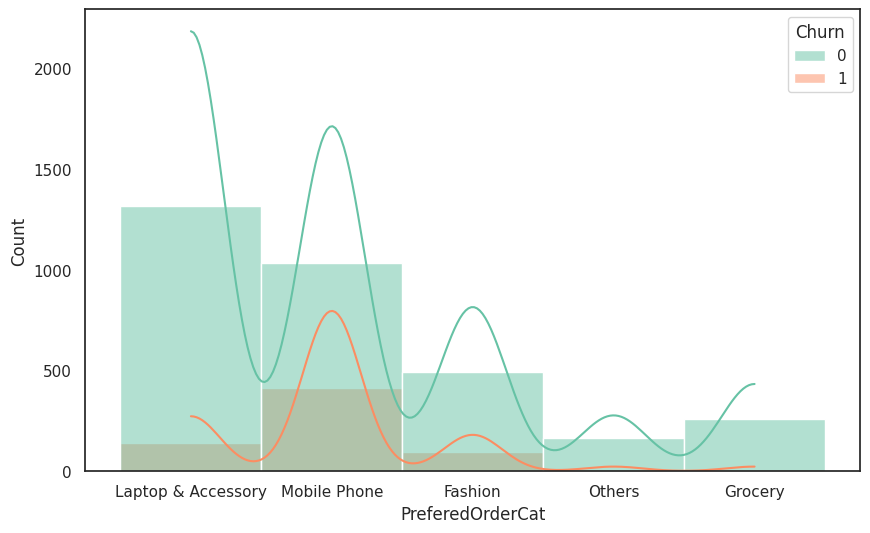

Churn,0,1,Total,Churn %
PreferedOrderCat,,,,
Fashion,491.0,94.0,585.0,16.1
Grocery,261.0,12.0,273.0,4.4
Laptop & Accessory,1316.0,142.0,1458.0,9.7
Mobile Phone,1032.0,414.0,1446.0,28.6
Others,167.0,12.0,179.0,6.7


In [21]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab


plt.figure(figsize=(10,6))
sns.histplot(data=df,x='PreferedOrderCat',hue='Churn',  kde= True)
plt.show();

crosstab_viz('Churn', 'PreferedOrderCat').T

**Fitur 'SatisfactionScore'**

Fitur 'SatisfactionScore' merupakan fitur yang berisi tentang skor kepuasan yang diberikan oleh para pelanggan terhadap aplikasi e-commerce yang telah mereka gunakan. Berdasarkan hasil analisis data dibawah, kita dapat mengetahui bahwa ternyata customer yang memberikan score 5 justru yang paling banyak berhenti dari layanan ecommerce. Sebaliknya, customer yang memberikan score 1 lebih sedikit yang churn. Hal ini membantah asumsi di awal dimana diperkirakan customer yang memberikan score 1 akan menunjukkan tingkat churn yang tinggi daripada customer yang memberikan score diatas 1

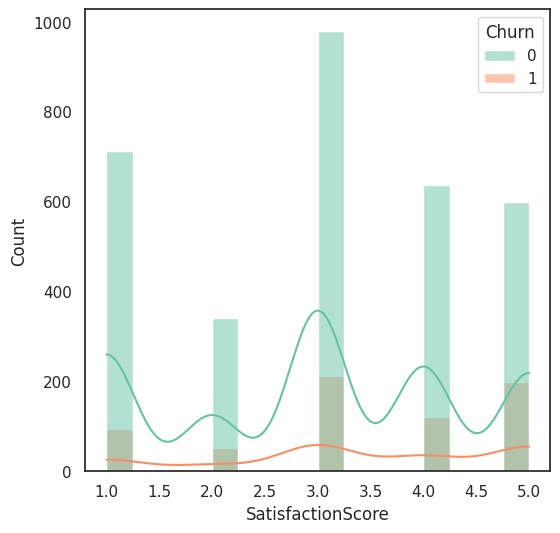

Churn,0,1,Total,Churn %
SatisfactionScore,,,,
1,712.0,93.0,805.0,11.6
2,341.0,51.0,392.0,13.0
3,979.0,211.0,1190.0,17.7
4,637.0,121.0,758.0,16.0
5,598.0,198.0,796.0,24.9


In [22]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab


plt.figure(figsize=(6,6))
sns.histplot(data=df,x='SatisfactionScore',hue='Churn',  kde= True)
plt.show();

crosstab_viz('Churn', 'SatisfactionScore').T

**Fitur 'MaritalStatus'**

Fitur status pernikahan memiliki korelasi terhadap churn. Berdasarkan grafik dibawah terlihat bahwa mayoritas pelanggan di e-commerce ini telah berstatus menikah. Namun, kebanyakan pelanggan yang melakukan churn merupakan pelanggan yang berstatus lajang. Hal ini ternyata membantah asumsi di awal yang memperkirakan pelanggan yang menikah akan menunjukkan tingkat churn yang lebih tinggi.

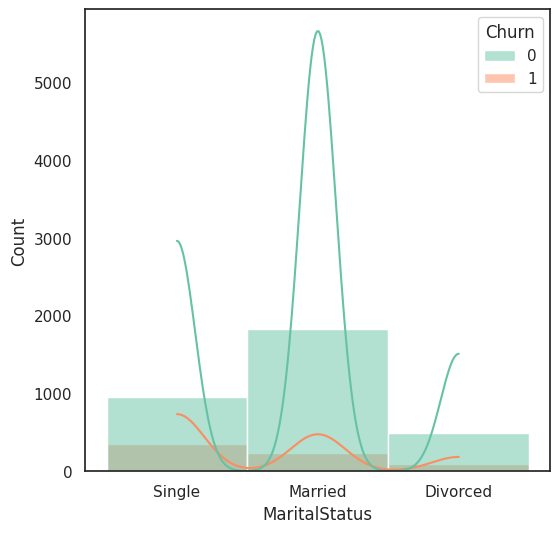

Churn,0,1,Total,Churn %
MaritalStatus,,,,
Divorced,487.0,89.0,576.0,15.5
Married,1825.0,230.0,2055.0,11.2
Single,955.0,355.0,1310.0,27.1


In [23]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab


plt.figure(figsize=(6,6))
sns.histplot(data=df,x='MaritalStatus',hue='Churn',  kde= True)
plt.show();

crosstab_viz('Churn', 'MaritalStatus').T

**Fitur NumberOfAddress**

Fitur 'NumberOfAddress' merupakan fitur yang berisi tentang jumlah alamat yang didaftarkan oleh para pelanggan ke aplikasi e-commerce. Dari data fitur tersebut terlihat bahwa para pelanggan memiliki lebih dari 1 alamat yang didaftarkan. Selain itu, semakin banyak jumlah alamat yang didaftarkan para pelanggan ke aplikasi e-commerce, kecenderungan para pelanggan untuk churn juga semakin meningkat.

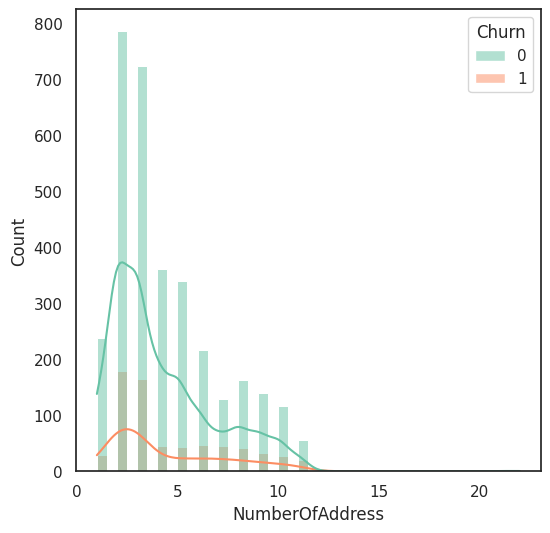

Churn,0,1,Total,Churn %
NumberOfAddress,,,,
1,237.0,29.0,266.0,10.9
2,785.0,178.0,963.0,18.5
3,723.0,164.0,887.0,18.5
4,361.0,45.0,406.0,11.1
5,340.0,44.0,384.0,11.5
6,216.0,47.0,263.0,17.9
7,129.0,45.0,174.0,25.9
8,163.0,41.0,204.0,20.1
9,139.0,32.0,171.0,18.7


In [24]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab


plt.figure(figsize=(6,6))
sns.histplot(data=df,x='NumberOfAddress',hue='Churn', kde= True)
plt.show();

crosstab_viz('Churn', 'NumberOfAddress').T


**Fitur 'Complain'**

Fitur 'Complain' berisikan informasi tentang jumlah komplain yang diberikan oleh para pelanggan ke aplikasi e-commerce. Sebanyak 29% pelanggan telah melakukan komplain terhadap pelayanan e-commerce dan 32% dari pelanggan yang melakukan komplain tersebut telah melakukan tindakan churn.

In [25]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab
crosstab_viz('Churn', 'Complain').T

Churn,0,1,Total,Churn %
Complain,,,,
0,2519.0,309.0,2828.0,10.9
1,748.0,365.0,1113.0,32.8


**Fitur 'DaySinceLastOrder'**

Fitur 'DaySinceLastOrder' merupakan fitur yang berisikan tentang informasi berapa hari sejak pemesanan terakhir yang dilakukan oleh para customer. Dari hasil analisis data dibawah terlihat bahwa baru sekitar 0-3 hari sejak pemesanan terakhir, banyak customer yang melakukan churn. Hal ini ternyata membantah asumsi di awal yang menduga customer yang churn adalah customer yang sudah lama tidak berbelanja, Hal ini bisa diasumsikan bahwa para pelanggan merasa tidak puas dengan pemesanan terakhirnya.

In [26]:
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab
crosstab_viz('Churn', 'DaySinceLastOrder').T


Churn,0,1,Total,Churn %
DaySinceLastOrder,,,,
0.0,222.0,123.0,345.0,35.7
1.0,310.0,128.0,438.0,29.2
2.0,461.0,85.0,546.0,15.6
3.0,541.0,91.0,632.0,14.4
4.0,272.0,40.0,312.0,12.8
5.0,132.0,23.0,155.0,14.8
6.0,69.0,12.0,81.0,14.8
7.0,269.0,45.0,314.0,14.3
8.0,334.0,48.0,382.0,12.6


**Fitur 'CashbackAmount'**

Fitur 'CashbackAmount' merupakan fitur yang berisikan tentang jumlah cashback yang didapatkan oleh para customer pada bulan lalu. Dari hasil grafik dibawah terlihat bahwa semakin sedikit cashback yang didapatkan oleh para pelanggan, maka pelanggan-pelanggan tersebut cenderung melakukan tindakan churn.

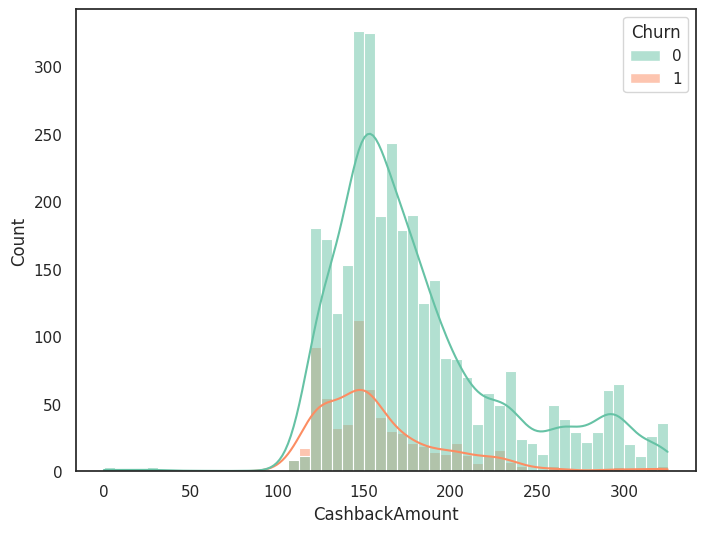

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='CashbackAmount',hue='Churn',kde=True)
plt.show();

## **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya.
Pada tahap ini akan dilakukan beberapa tahap preprocessing dan feature engineering, antara lain:

*   Melakukan handling missing value dengan kombinasi antara iterative imputer dan simple imputer. Simple imputer akan diisi rata-rata dengan kolom yang memiliki korelasi.
*   Melakukan OneHotEncoding pada kolom MaritalStatus dan PreferedOrderCat karena memiliki kategori sedikit dan tidak ada susunan tertentu

**Missing Value**

 Handling missing value yang akan dilakukan adalah dengan menggunakan kombinasi antara iterative imputer dan simple imputer. Simple imputer akan diisi rata-rata dengan kolom yang memiliki korelasi.Lalu fitur-fitur kartegorikal akan dilakukan one hot encoding dikarenakan fitur-fitur tersebut tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [28]:
#Handling Missing Value 
transformer = ColumnTransformer([
    ('imp_simp_tenur',SimpleImputer(fill_value=df.groupby('CashbackAmount')['Tenure'].mean().round(0)),['Tenure']), #0.432
    ('imp_simp_daysince',SimpleImputer(fill_value=df.groupby('CashbackAmount')['DaySinceLastOrder'].mean().round(0)),['DaySinceLastOrder']), #0.376
    ('imp_iter', IterativeImputer(),['Tenure' , 'WarehouseToHome']),
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = 'ignore'), ['MaritalStatus','PreferedOrderCat']),
], remainder='passthrough')

**Data Spitting**

In [29]:
# Memisahkan data independen variabel dengan target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [30]:
# Train Test Split dengan test size 80:20
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2000)

In [31]:
testing = pd.DataFrame(transformer.fit_transform(X_train),
                       columns=transformer.get_feature_names_out())
testing.head()

,imp_simp_tenur__Tenure,imp_simp_daysince__DaySinceLastOrder,imp_iter__Tenure,imp_iter__WarehouseToHome,One Hot__MaritalStatus_Married,One Hot__MaritalStatus_Single,One Hot__PreferedOrderCat_Grocery,One Hot__PreferedOrderCat_Laptop & Accessory,One Hot__PreferedOrderCat_Mobile Phone,One Hot__PreferedOrderCat_Others,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__CashbackAmount
0,0.000000,2.0,0.000000,35.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,5.0,9.0,0.0,149.69
1,1.000000,5.0,1.000000,7.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0,166.74
2,0.000000,7.0,0.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,203.25
3,10.202671,2.0,10.248307,13.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,5.0,0.0,120.89
4,4.000000,0.0,4.000000,14.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,264.22


## **Modeling**

In [32]:
# Classification Models
logreg = LogisticRegression(random_state=2000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2000)
rf = RandomForestClassifier(random_state=2000)
xgb = XGBClassifier()

### **Model Benchmarking: SMOTE & K-Fold**

Beberapa hal yang diperhatikan pada benchmark model ini antara lain:


*  Dataset yang digunakan merupakan data imbalance sehingga perlu dilakukannya resampling. Metode resampling yang digunakan adalah SMOTE yaitu menambah data pada kelas minoritas.
*   Kemudian akan dilakukan stratified K-Fold yang bertujuan untuk mempertahankan distribusi kelas target(churn), pada saat data splitting untuk cross validation.
*   Metrik yang digunakan adalah ROC-AUC, karena ingin melihat probability dan kedua kelas sama pentingnya.
*   Hyperparameter disetting default dan semua fitur digunakan

In [33]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE (random_state=2000)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model')

,mean roc_auc,sdev
model,,
Logistic Regression,0.879361,0.019906
KNN,0.848330,0.018492
Decision Tree,0.839421,0.028797
Random Forest,0.957754,0.010382
XGBoost,0.956568,0.007889


Pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter default adalah Random Forest dan XGBoost dengan nilai rata-rata ROC-AUC masing-masing 0.957 dan 0.956. Nilai metrik dinilai cukup tinggi, sehingga akan dicoba implementasi pada data test.

### **Model Benchmarking: Test Data**

In [34]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=2000)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append( roc_auc_score (y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       654
           1       0.44      0.82      0.57       135

    accuracy                           0.79       789
   macro avg       0.70      0.80      0.71       789
weighted avg       0.87      0.79      0.81       789

KNN 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       654
           1       0.44      0.80      0.57       135

    accuracy                           0.79       789
   macro avg       0.70      0.80      0.72       789
weighted avg       0.86      0.79      0.81       789

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       654
           1       0.70      0.79      0.74       135

    accuracy                           0.91       789
   macro avg       0.83      0.86      0.84       789
weighted avg       0.91      0

,roc_auc score
model,
Random Forest,0.950595
XGBoost,0.947151
KNN,0.869232
Logistic Regression,0.864345
Decision Tree,0.858189


Dari data diatas dapat dilihat untuk model Random Forest dan XGBoost dengan nilai rata-rata ROC-AUC masing-masing 0.950 dan 0.947. Sehingga step selanjutnya adalah meningkatkan performa dengan melakukan tuning hyperparameter pada modelRandom Forest dan XGBoost dan membandingkan performanya.

### **Hyperparameter Tuning**

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Random forest dan XGBoost, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:

*   Random Forest : n_estimator (default 100), max_depth (default none), max_leaf (default 1), max split (default 2)
*   XGBoost : learning rate (default 0,3), max_depth (default 6), n_estimators (default 100), subsample (default 1)

In [35]:
smote_ = SMOTE(random_state=2000)
xgb = XGBClassifier(random_state=2000)
Pipe_rf = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=2000, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(X_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[2000]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(X_train,y_train)  

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.8s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.8s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2000, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imp_simp_tenur',
                                                                         SimpleImputer(fill_value=CashbackAmount
0.00       6.0
12.00      6.0
25.00      7.0
37.00      7.0
56.00      0.0
          ... 
323.59    19.0
324.26    24.0
324.43    30.0
324.73    15.0
324.99    26.0
Name: Tenu...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=2000, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [2000],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [36]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_) 

Random Forest Hyperparameter
0.9561612125666967
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 200}
XGBoost Hyperparameter
0.9642399049398188
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 17, 'model_xgb__n_estimators': 200, 'model_xgb__random_state': 2000, 'model_xgb__subsample': 1}


Hyperparameter tuning dilakukan dengan membandingkan nilai default dengan nilai yang nilainya ditune secara berulang, selain itu dibantu dengan iterasi grid search. Dari pengamatan yang dilakukan dengan beberapa kali percobaan tuning, didapatkan parameter terbaik dengan data berikut:
*   Pada random forest, nilai terbaik yang didapatkan 0.956, dengan nilai max depth terbaik 17, min sample leaf 2, min sample split seperti default yaitu 2, dan n_estimator 200
*   Pada XGBoost, nilai terbaik yang didapatkan 0.964, dengan nilai learning rate 0,08, max depth 17, n_estimator 200, dan subsample 1
Dengan tuning nilai pada XGBoost lebih tinggi dibanding nilai pada Random Forest
Sehingga untuk selanjutnya akan dilanjutkan dengan XGBoost saja.

In [37]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_simp_tenur',
                                                  SimpleImputer(fill_value=CashbackAmount
0.00       6.0
12.00      6.0
25.00      7.0
37.00      7.0
56.00      0.0
          ... 
323.59    19.0
324.26    24.0
324.43    30.0
324.73    15.0
324.99    26.0
Name: Tenure, Length: 2335, dtype: float64),
                                                  ['Tenure']),
                                                 ('imp_simp_daysince',
                                                  SimpleImputer(fill_value=CashbackAmount
0.00...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=17, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=2000, ...))])

In [38]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_simp_tenur',
                                                  SimpleImputer(fill_value=CashbackAmount
0.00       6.0
12.00      6.0
25.00      7.0
37.00      7.0
56.00      0.0
          ... 
323.59    19.0
324.26    24.0
324.43    30.0
324.73    15.0
324.99    26.0
Name: Tenure, Length: 2335, dtype: float64),
                                                  ['Tenure']),
                                                 ('imp_simp_daysince',
                                                  SimpleImputer(fill_value=CashbackAmount
0.00...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [39]:
#Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

ROC AUC Score Default xgb :  0.9471514327783441
ROC AUC Score Tuned xgb :  0.9528259145996149


In [40]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       654
           1       0.79      0.84      0.82       135

    accuracy                           0.94       789
   macro avg       0.88      0.90      0.89       789
weighted avg       0.94      0.94      0.94       789

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       654
           1       0.80      0.84      0.82       135

    accuracy                           0.94       789
   macro avg       0.88      0.90      0.89       789
weighted avg       0.94      0.94      0.94       789



Berdasarkan data diatas dapat diketahui bahwa:

*   Dari melakukan hyperparameter tuning, dapat dilihat selisih test XGBoost default dan tuned tidak berbeda jauh yaitu selisih ROC_AUC 0.006, namun parameter yang telah dituning meningkat menjadi 0.952.
*  Sehingga model yang akan digunakan adalah model yang menggunakan hyperparameter tuning, dengan metrik yang didapatkan pada kelas positif yaitu recall 0.84 dan precision 0.80, dengan f1 score 0.82. Pada kelas negatif didapat recall 0.96 dan precision 0.97, dengan f1 score 0.96. diamana dapat disimpulkan bawha performa model yang dihasilkan sudah sangat baik

### **Feature Importances**

Selanjutnya adalah melihat fitur yang paling mempengaruhi potensi pelanggan churn

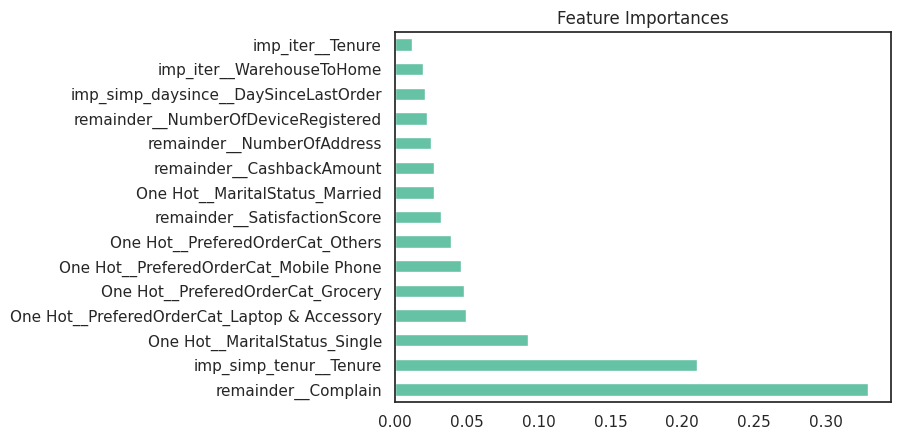

In [41]:
coef1 = pd.Series(best_model[2].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Analisis Feature Importance
Dari data diatas dapat dilihat 3 faktor yang paling mempengaruhi potensi pelanggan churn yaitu complain, masa tenure pelanggan, dan marital status.

Oleh karena itu, perusahaan harus menerima feedback dari pelanggan yang melakukan complain dan menindak-lanjuti complain tersebut. Selain itu perusahaan dapat meningkatkan retensi pelanggan dengan memberi promo-promo menarik yang berkelanjutan.

### **Model Akhir**
Export model terbaik dengan pickle format sav

In [54]:
# Export model
best_model = xgb_grid.best_estimator_
filename = 'Model_final.sav'
#Churn_model = best_model.fit(X_train, y_train)
pickle.dump(best_model, open(filename, 'wb'))

In [58]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion and Recommendation**

### **Conclusion**

Berdasarkan performa model machine learning yang telah dibangun, didapatkan bahwa performa model menghasilkan nilai F1 score sekitar 0.82 dan Recall 0.84. Kita dapat menyimpulkan bahwa bila seandainya model kita ini digunakan untuk memfilter/menyaring list pelanggan yang akan menjadi target pemasaran kita, maka model kita dapat mendeteksi 84% pelanggan yang akan churn, dan model kita mendapatkan 96% pelanggan yang memilih untuk retain/stay (semua ini berdasarkan recallnya).

Model kita ini memiliki ketepatan prediksi pelanggan yang churn sebesar 80% (precision). Jadi setiap model kita memprediksi bahwa seorang kandidat itu akan churn, maka kemungkinan tebakannya benar itu sebesar 80% kurang lebih. Maka masih akan ada pelanggan yang sebenarnya churn tetapi diprediksi sebagai pelanggan yang tidak churn sekitar 4% dari keseluruhan pelanggan yang churn (berdasarkan recall).


Bila seandainya mempertahankan pelanggan membutuhkan biaya 10 USD, sedangkan menurut Mathai (2020) mendapatkan pelanggan baru membutuhkan 5 sampai 6 kali lebih mahal, sehingga diasumsikan biayanya menjadi 50USD. jika perusahaan memiliki 1000 customer (200 churn dan 800 tidak churn), maka simulasi perhitungan biaya yang bisa di hemat adalah sebagai berikut:

*Tanpa Model* (Semua pelanggan diberikan penawaran):

*   Total Biaya => 1.000 * 10 = 10.000 USD
*   **biaya yang terbuang (total pelanggan tidak churn yang diberi diskon) => 800 * 10 = 8.000 USD**


*Dengan Model* (Penawaran diberikan sesuai prediksi):

*   Total Biaya => (200 x 0.84) x 10= 1.680 USD
*   Total pelanggan churn yang ditemukan => (200 x 0.84)= 168 orang
*   Total pelanggan churn yang tidak ditemukan => 32 + (800 x 0.04) = 64 orang
*   Total pelanggan tidak churn yang ditemukan => (800 x 0.96)= 768 orang
*   Total pelanggan tidak churn yang tidak ditemukan => 32 orang
*   **Biaya yang terbuang => (64x 10 USD) + (32 X 50 USD) = 640 + 1600 = 2.240 USD**


**Jumlah penghematan => 8.000USD - 2.240USD = 5.760 USD (72%)**


Dengan adanya bantuan model, perusahan e-commerce dapat menghemat biaya yang cukup besar (72%) dengan melakukan pemasaran yang lebih tepat sasaran.

Selain itu, berdasarkan analisa faktor yang berpengaruh dengan customer churn adalah complain dan masa tenure pelanggan. Hal tersebut harus diperhatikan, apabila pelanggan melakukan complain dan semakin kecil masa tenure pelanggan, ada potensi customer churn.

### **Recommendation**

Adapun beberapa rekomendasi yang dapat diberikan terkait sisi bisnis dan model:



1.   Bussiness
      *  Memperhatikan complain yang diberikan pelanggan, baik itu dari segi kemudahan penggunaan platform e-commerce, memperbanyak variasi produk dengan mencari mitra, mengoptimalkan live chat antar pelanggan-pembeli dan pelanggan-support centre, memonitor dan memberi pelatihan kepada marketplace yang terdaftar sehingga memberikan service dan produk yang memuaskan
      *  Memberikan penawaran pada pelanggan dengan masa tenure 0-2 bulan yang berpotensi churn, berupa promo, cashback, atau subscription sehingga pelanggan lebih tertarik untuk menggunakan platform e-commerce terus-menerus.
      *  Mengimplementasikan gamification untuk meningkatkan periode customer menggunakan layanan e-commerce (misal. sistem poin, sistem leveling, etc.)
      *  Membuat marketing campaign yang lebih segmented (terutama untuk customer dengan karakteristik churn lebih tinggi, customer yang berstatus single, dll).

1.   Modeling
      *  Menambah sampel pada dataset agar model dapat memiliki banyak referensi sehingga prediksi bisa menjadi lebih tepat.
      *  Adanya kolom dengan fitur lain yang berhubungan langsung dengan servis yang perusahaan e-commerce berikan, seperti berapa lama pengiriman produk, ketepatan waktu pengiriman, kolom customer service helpful atau tidak, dan sebagainya
      * Mencoba algorithm ML yang lain yang lebih optimal atau mencoba melakukan hyperparameter tuning dengan nilai yang sudah didapat sebagai referensi.
      * Menganalisa data-data yang model kita masih salah prediksi untuk mengetahui alasannya dan karakteristiknya bagaimana.











# Thank You